## Day 30 Lecture 1 Assignment

In this assignment, we will build our first random forest model. We will use a dataset containing churn information for a telephone company's customers.

In [24]:
%matplotlib inline
#Setup dataframe and visualizations
import math
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


#Figure set up for dark theme:
plt.style.use(['dark_background'])
#Color to set all my graphs.
color = '#F9EDF5'
sns.set()

#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [25]:
def get_df(url):
  df = pd.read_csv(url)
  return df

Read in the telecom churn dataset.

In [26]:
# answer here
url = 'https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/telecom_churn.csv'
telecom = get_df(url)
telecom.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [27]:
#I lost my most important feature because I don't know how to handle this categorical value. 
telecom['ServiceArea'].value_counts()

NYCBRO917    1684
HOUHOU281    1510
DALDAL214    1498
NYCMAN917    1182
APCFCH703     783
             ... 
FLNKEH352       1
OHIRAV330       1
SEWKHF541       1
NORALX320       1
NCRSMF757       1
Name: ServiceArea, Length: 747, dtype: int64

Perform the following preprocessing steps:

- This dataset has many columns; identify a subset of 10-15 features that you think could affect a customer's propensity to churn (also called "customer loss" or "customer attrition"). Include at least 1 categorical variable.
- Drop all rows that containing any missing values (this should be a fairly small number of rows)
- Convert the response from a string to a binary 1-0 encoding.

In [28]:
telecom.dropna(inplace=True)
# answer goes here
target = telecom['Churn']
target = pd.get_dummies(target, drop_first=True)

cols = ['MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'OverageMinutes',
       'PercChangeMinutes', 'PercChangeRevenues','MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'HasCreditCard',
       'ReferralsMadeBySubscriber']
df = telecom[cols]
df = pd.get_dummies(df, drop_first=True)
df = df.dropna()
df.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,PercChangeMinutes,PercChangeRevenues,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,ReferralsMadeBySubscriber,HasCreditCard_Yes
0,24.00,219.0,22.0,0.0,-157.0,-19.0,61,2,1,2.0,2.0,361.0,0,1
1,16.99,10.0,17.0,0.0,-4.0,0.0,58,1,1,2.0,1.0,1504.0,0,1
2,38.00,8.0,38.0,0.0,-2.0,0.0,60,1,1,1.0,1.0,1812.0,0,1
3,82.28,1312.0,75.0,0.0,157.0,8.1,59,2,2,9.0,4.0,458.0,0,1
4,17.14,0.0,17.0,0.0,0.0,-0.2,53,2,2,4.0,3.0,852.0,0,1


In [29]:
#All numerical values. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49752 entries, 0 to 51043
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MonthlyRevenue             49752 non-null  float64
 1   MonthlyMinutes             49752 non-null  float64
 2   TotalRecurringCharge       49752 non-null  float64
 3   OverageMinutes             49752 non-null  float64
 4   PercChangeMinutes          49752 non-null  float64
 5   PercChangeRevenues         49752 non-null  float64
 6   MonthsInService            49752 non-null  int64  
 7   UniqueSubs                 49752 non-null  int64  
 8   ActiveSubs                 49752 non-null  int64  
 9   Handsets                   49752 non-null  float64
 10  HandsetModels              49752 non-null  float64
 11  CurrentEquipmentDays       49752 non-null  float64
 12  ReferralsMadeBySubscriber  49752 non-null  int64  
 13  HasCreditCard_Yes          49752 non-null  uin

Although some implementations of tree-based models support categorical variables directly, scikit-learn's implementation does not, so we will need to convert our categorical variable(s) into numbers. In linear regression, we used one-hot/dummy encoding, but this has drawbacks that can be particularly problematic in the context of trees. Namely, dummy encoding can lead to very sparse columns when dealing with high-dimensional categorical features; the tree treats these levels as indepedent features is very unlikely to make a split on any of the individual levels, since the corresponding columns consist almost entirely consist of a single value.

Ideally, we would consider all of the levels simultaneously, which trees can do efficiently. However, sklearn does not implement this efficient algorithm for splitting on categorical variables. In this situation, a better alternative to dummy encoding is leave-one-out-encoding. This transforms each categorical into its conditional probability of the positive class, excluding the observation itself to avoid potential data leakage. Perform the following steps:

- Create an 80-20 train/test split on the data
- Fit a leave-one-out encoder to the training data and encode the categorical variables in the training data. The category_encoders package is helpful for this task. (Note that this ordering is important; if we fitted the encoder to the full dataset before making the train/test split, we would introduce data leakage by allowing the test data to affecting the estimates of the category-conditional probabilities.)

In [38]:
y = target
X = df

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score
#Size of the test set.
SIZE = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=SIZE)
print('There are {:d} training samples and {:d} test samples'.format(X_train.shape[0], X_test.shape[0]))

There are 39801 training samples and 9951 test samples


In [40]:
# answer goes here
#We don't have a practical example/column to how to work with this leave-one-out encoder. 
#All of the categorical features that are choosing to predict on are binary and therefore; not suited for leave-one-out encoding. 

Next, fit the random forest model. You can tinker with or tune the parameters if you like, although we will use the default parameter values.

In [41]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

To evaluate our model, produce the predicted values for the test sample. Remember to apply our previously fitted encoder to the test data prior to making predictions.

In [42]:
# answer goes here
#cross_val_score(rfc, X, Y, cv=cv)

y_pred = rfc.predict(X_test)


After making the predictions, print out the classification report (sklearn.metrics.classification_report). In addition, plot the confusion matrix and ROC curve. How did our model perform?

In [47]:
import sklearn
#confusion matrix
sklearn.metrics.confusion_matrix(y_test, y_pred)



array([[6713,  352],
       [2524,  362]])

In [48]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.95      0.82      7065
           1       0.51      0.13      0.20      2886

    accuracy                           0.71      9951
   macro avg       0.62      0.54      0.51      9951
weighted avg       0.66      0.71      0.64      9951



Area under the ROC curve: 0.538


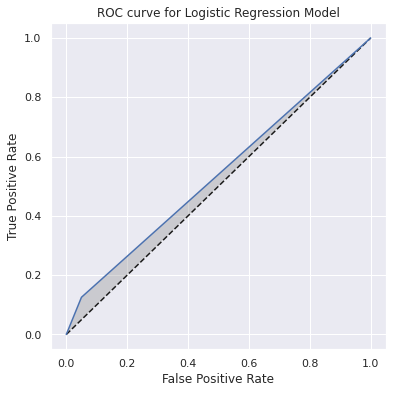

In [49]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
probs = y_pred
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)
print('Area under the ROC curve: {:.3f}'.format(auc))

fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.fill(fpr, tpr, 'grey', alpha=0.3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest Model')
plt.show()





Print the feature importances, ordered by importance from high to low. What is the default sklearn feature importance metric?

Feature ranking:
1. feature 11 (0.142273)
2. feature 1 (0.140325)
3. feature 4 (0.134695)
4. feature 0 (0.126468)
5. feature 5 (0.118292)
6. feature 6 (0.087205)
7. feature 3 (0.072009)
8. feature 2 (0.071531)
9. feature 7 (0.026114)
10. feature 9 (0.023410)
11. feature 8 (0.017157)
12. feature 10 (0.016600)
13. feature 13 (0.016270)
14. feature 12 (0.007650)


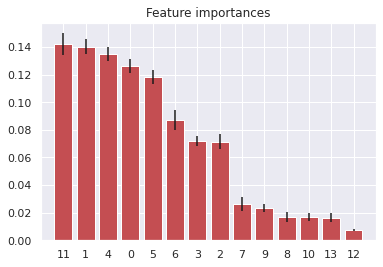

In [50]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()